In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Carica i dati dal file CSV
df = pd.read_csv('output_letter_frequencies.csv')

# Lista delle lingue (escludendo la colonna 'Letter')
languages = df.columns[1:]

# Lunghezza dell'alfabeto
alphabet_length = len(df)

# Larghezza delle barre
bar_width = 0.35

# Posizioni delle barre
index = np.arange(alphabet_length)

# Creazione della cartella per salvare i grafici
output_folder = 'output_histograms'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Per ciascuna lingua, crea un grafico a istogramma
for lang in languages:
    # Seleziona le frequenze di lettere per latino e la lingua corrente
    latin_frequencies = df['lat']
    lang_frequencies = df[lang]
    
    # Crea il grafico a istogramma
    fig, ax = plt.subplots()
    
    # Barre per il latino
    bars1 = ax.bar(index, latin_frequencies, bar_width, label='Latin')
    
    # Barre per la lingua corrente
    bars2 = ax.bar(index + bar_width, lang_frequencies, bar_width, label=lang)
    
    # Etichette, titolo e legenda
    ax.set_xlabel('Letters')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Letter Frequency Comparison - Latin vs {lang}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(df['Letter'])
    ax.legend()
    
    # Salva il grafico come file PNG
    plot_path = os.path.join(output_folder, f'latin_vs_{lang}.png')
    plt.savefig(plot_path)
    plt.close(fig)

    print(f"Saved plot for Latin vs {lang} in: {plot_path}")


Saved plot for Latin vs fr in: output_histograms\latin_vs_fr.png
Saved plot for Latin vs esp in: output_histograms\latin_vs_esp.png
Saved plot for Latin vs ita in: output_histograms\latin_vs_ita.png
Saved plot for Latin vs lat in: output_histograms\latin_vs_lat.png
Saved plot for Latin vs ru in: output_histograms\latin_vs_ru.png
Saved plot for Latin vs prt in: output_histograms\latin_vs_prt.png


SyntaxError: unmatched ']' (2008428757.py, line 45)

In [20]:
import pandas as pd
import numpy as np

# Carica i dati dal file CSV
df = pd.read_csv('output_letter_frequencies.csv')

# Calcola la matrice di correlazione tra latino e tutte le altre lingue
correlation_matrix = df.drop(columns='Letter').corr()

# Visualizza la matrice di correlazione
print("Matrice di correlazione tra latino e le altre lingue:")
print(correlation_matrix)


Matrice di correlazione tra latino e le altre lingue:
           fr       esp       ita       lat        ru       prt
fr   1.000000  0.881043  0.846004  0.899616  0.837055  0.830080
esp  0.881043  1.000000  0.914996  0.837912  0.856356  0.964673
ita  0.846004  0.914996  1.000000  0.884350  0.950180  0.891638
lat  0.899616  0.837912  0.884350  1.000000  0.937691  0.837419
ru   0.837055  0.856356  0.950180  0.937691  1.000000  0.824819
prt  0.830080  0.964673  0.891638  0.837419  0.824819  1.000000


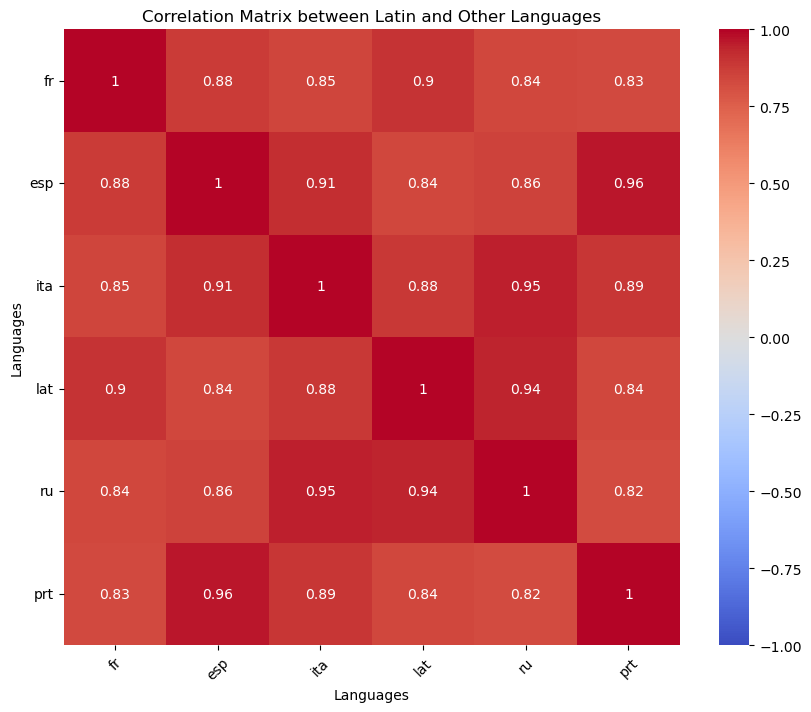

Heatmap saved as: output_heatmaps\correlation_heatmap.png


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Carica i dati dal file CSV
df = pd.read_csv('output_letter_frequencies.csv')

# Calcola la matrice di correlazione tra latino e tutte le altre lingue
correlation_matrix = df.drop(columns='Letter').corr()

# Imposta le dimensioni della figura
plt.figure(figsize=(10, 8))

# Crea il heatmap utilizzando seaborn
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)

# Modifica le etichette delle annotazioni in inglese
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.xlabel('Languages')
plt.ylabel('Languages')

# Aggiungi titolo
plt.title('Correlation Matrix between Latin and Other Languages')

# Mostra il grafico
plt.show()

# Salvataggio del grafico come file PNG
output_folder = 'output_heatmaps'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

plot_path = os.path.join(output_folder, 'correlation_heatmap.png')
plt.savefig(plot_path)
plt.close()

print(f"Heatmap saved as: {plot_path}")


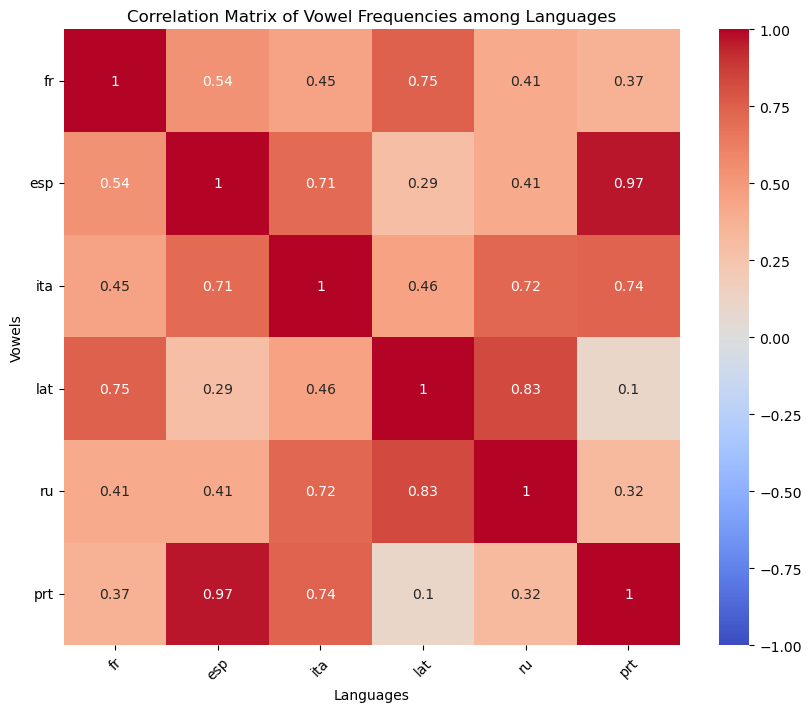

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carica i dati dal file CSV
df = pd.read_csv('output_letter_frequencies.csv')

# Seleziona solo le vocali (a, e, i, o, u)
vowels = ['a', 'e', 'i', 'o', 'u']
df_vowels = df[df['Letter'].isin(vowels)]

# Seleziona solo le colonne delle lingue
languages = df.columns[1:]

# Crea un nuovo DataFrame solo con le colonne delle lingue e vocali
df_vowels_languages = df_vowels[languages]

# Calcola la matrice di correlazione
correlation_matrix = df_vowels_languages.corr()

# Imposta le dimensioni della figura
plt.figure(figsize=(10, 8))

# Crea il heatmap utilizzando seaborn
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)

# Modifica le etichette delle annotazioni in inglese
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.xlabel('Languages')
plt.ylabel('Vowels')

# Aggiungi titolo
plt.title('Correlation Matrix of Vowel Frequencies among Languages')

# Mostra il grafico
plt.show()


In [82]:
import pandas as pd

# Load data from CSV file
df = pd.read_csv('output_letter_frequencies.csv')

# List of languages (excluding the 'Letter' column)
languages = df.columns[1:]

# Function to find the most frequent vowel and consonant for a language
def find_most_frequent(df, lang):
    # Select rows for the specified language
    lang_data = df[df[lang] == df[lang].max()]
    
    # Find the most frequent vowel
    vowels = ['a', 'e', 'i', 'o', 'u']
    max_vowel = lang_data[lang_data['Letter'].isin(vowels)]
    most_frequent_vowel = max_vowel.iloc[0]['Letter'] if not max_vowel.empty else None
    freq_vowel = max_vowel.iloc[0][lang] if not max_vowel.empty else 0
    
    # Find the most frequent consonant (excluding vowels)
    consonants = df[~df['Letter'].isin(vowels)]
    max_consonant = consonants[consonants[lang] == consonants[lang].max()]
    most_frequent_consonant = max_consonant.iloc[0]['Letter'] if not max_consonant.empty else None
    freq_consonant = max_consonant.iloc[0][lang] if not max_consonant.empty else 0
    
    return most_frequent_vowel, freq_vowel, most_frequent_consonant, freq_consonant

# Find the most frequent vowel and consonant for each language
results = {}
for lang in languages:
    vowel, freq_vowel, consonant, freq_consonant = find_most_frequent(df, lang)
    
    # Find the frequency of the same vowel and consonant in Latin
    latin_vowel_freq = df[df['Letter'] == vowel]['lat'].values[0] if vowel else 0
    latin_consonant_freq = df[df['Letter'] == consonant]['lat'].values[0] if consonant else 0
    
    # Calculate proximity coefficient as ratio of frequency in language to Latin
    vowel_closeness = freq_vowel / latin_vowel_freq if latin_vowel_freq > 0 else 0
    consonant_closeness = freq_consonant / latin_consonant_freq if latin_consonant_freq > 0 else 0
    
    results[lang] = {
        'Most frequent vowel': vowel,
        'Vowel frequency': freq_vowel,
        'Most frequent consonant': consonant,
        'Consonant frequency': freq_consonant,
        'Vowel closeness coefficient': vowel_closeness,
        'Consonant closeness coefficient': consonant_closeness
    }

# Display results
for lang, data in results.items():
    print(f"Language: {lang}")
    print(f"Most frequent vowel: {data['Most frequent vowel']} - Frequency: {data['Vowel frequency']} - Vowel closeness coefficient: {data['Vowel closeness coefficient']:.2f}")
    print(f"Most frequent consonant: {data['Most frequent consonant']} - Frequency: {data['Consonant frequency']} - Consonant closeness coefficient: {data['Consonant closeness coefficient']:.2f}")
    print()


Language: fr
Most frequent vowel: e - Frequency: 0.1753405864550382 - Vowel closeness coefficient: 1.45
Most frequent consonant: s - Frequency: 0.0970025511352281 - Consonant closeness coefficient: 1.28

Language: esp
Most frequent vowel: a - Frequency: 0.1332197607754088 - Vowel closeness coefficient: 1.37
Most frequent consonant: s - Frequency: 0.0860333368028192 - Consonant closeness coefficient: 1.14

Language: ita
Most frequent vowel: e - Frequency: 0.1213377988803217 - Vowel closeness coefficient: 1.01
Most frequent consonant: r - Frequency: 0.071572185237911 - Consonant closeness coefficient: 1.02

Language: lat
Most frequent vowel: e - Frequency: 0.1205849544279689 - Vowel closeness coefficient: 1.00
Most frequent consonant: t - Frequency: 0.0831587539110325 - Consonant closeness coefficient: 1.00

Language: ru
Most frequent vowel: a - Frequency: 0.1349427002102122 - Vowel closeness coefficient: 1.38
Most frequent consonant: t - Frequency: 0.0749983047399471 - Consonant closene

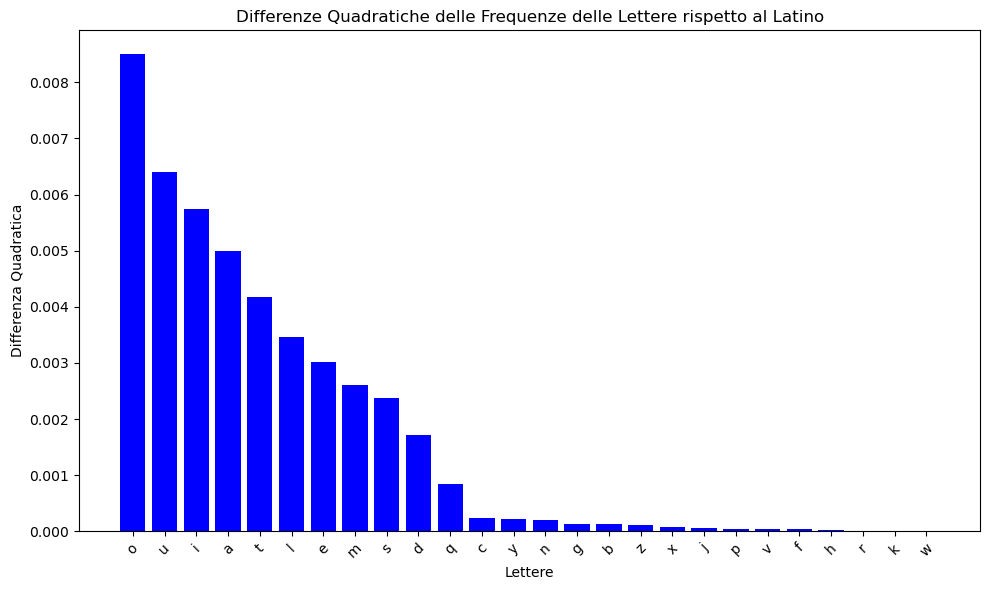

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dal file CSV
df = pd.read_csv('output_letter_frequencies.csv')

# Calcola la differenza quadratica delle frequenze rispetto al latino
df['Squared_diff'] = (df.drop(columns=['Letter', 'lat']).sub(df['lat'], axis=0) ** 2).sum(axis=1)

# Ordina il DataFrame per la differenza quadratica in ordine decrescente
df_sorted = df.sort_values(by='Squared_diff', ascending=False)

# Prepara il plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df_sorted['Letter'], df_sorted['Squared_diff'], color='blue')

# Aggiungi etichette e titoli
plt.xlabel('Lettere')
plt.ylabel('Differenza Quadratica')
plt.title('Differenze Quadratiche delle Frequenze delle Lettere rispetto al Latino')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostra il plot
plt.tight_layout()
plt.show()


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Carica i dati dal file CSV
df = pd.read_csv('output_letter_frequencies.csv')

# Lista delle lingue (escludendo il latino)
languages = df.columns[1:]

# Prepara il plot delle differenze quadratiche
plt.figure(figsize=(12, 8))

# Itera su ogni lingua per calcolare e disegnare le differenze quadratiche
for lang in languages:
    # Calcola le differenze quadratiche rispetto al latino per ogni lettera
    squared_diffs = []
    for letter in df['Letter']:
        squared_diff = (df.loc[df['Letter'] == letter, 'lat'].values[0] - df.loc[df['Letter'] == letter, lang].values[0])**2
        squared_diffs.append(squared_diff)
    
    # Disegna la linea per la lingua corrente
    plt.plot(df['Letter'], squared_diffs, marker='o', label=f'{lang} - Latino')

# Etichette e titoli
plt.xlabel('Lettere')
plt.ylabel('Differenza Quadratica')
plt.title('Differenza Quadratica delle Frequenze delle Lettere rispetto al Latino per ogni Lingua')
plt.legend()
plt.grid(True)

# Mostra il plot
plt.tight_layout()
plt.xticks(rotation=0)

# Salvataggio del plot come file PNG
output_folder = 'output_plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

plot_path = os.path.join(output_folder, 'quadratic_differences.png')
plt.savefig(plot_path)
plt.close()

print(f"Plot saved as: {plot_path}")


Plot saved as: output_plots\quadratic_differences.png


In [66]:
import pandas as pd
from scipy.stats import ttest_1samp

# Carica i dati dal file CSV
df = pd.read_csv('output_letter_frequencies.csv')

# Escludi le lettere specificate
letters_to_exclude = ['q', 'w', 'j', 'k']
df = df[~df['Letter'].isin(letters_to_exclude)]

# Calcola la differenza quadratica delle frequenze rispetto al latino per ogni lingua
for lang in df.columns[1:]:
    if lang != 'lat':  # Escludi la colonna 'lat' dal calcolo delle differenze quadratiche
        df[f'{lang}_squared_diff'] = (df[lang] - df['lat']) ** 2

# Stampa il DataFrame per verificare le colonne
print(df.head())

# Calcola media, varianza, massimo e minimo per ogni lingua
stats = {}
mean_squared_diff = {}
for lang in df.columns[1:]:
    if lang != 'lat':
        squared_diff_col = f'{lang}'
        mean = df[squared_diff_col].mean()
        variance = df[squared_diff_col].var()
        max_value = df[squared_diff_col].max()
        max_letter = df.loc[df[squared_diff_col].idxmax(), 'Letter']
        min_value = df[squared_diff_col].min()
        min_letter = df.loc[df[squared_diff_col].idxmin(), 'Letter']
        mean_squared_diff[lang] = mean
        stats[lang] = {
            'Mean': mean,
            'Variance': variance,
            'Max Value': max_value,
            'Max Letter': max_letter,
            'Min Value': min_value,
            'Min Letter': min_letter
        }

# Determina la lingua con la differenza quadratica media più bassa rispetto al latino
closest_language = min(mean_squared_diff, key=mean_squared_diff.get)
closest_mean_diff = mean_squared_diff[closest_language]

# Stampa delle statistiche per ogni lingua
for lang, values in stats.items():
    print(f"Lingua: {lang}")
    print(f"Media della differenza quadratica: {values['Mean']:.6f}")
    print(f"Varianza della differenza quadratica: {values['Variance']:.6f}")
    print(f"Massimo della differenza quadratica: {values['Max Value']:.6f} (Lettera: {values['Max Letter']})")
    print(f"Minimo della differenza quadratica: {values['Min Value']:.6f} (Lettera: {values['Min Letter']})")
    print()

# Test t di Student per verificare la significatività della differenza media rispetto alla media delle altre lingue
significant = {}
for lang in df.columns[1:]:
    if lang != 'lat':
        squared_diff_col = f'{lang}'
        t_stat, p_value = ttest_1samp(df[squared_diff_col], df['lat'].mean())
        significant[lang] = p_value < 0.05  # Consideriamo significativo se p-value < 0.05

# Stampiamo i risultati
print(f"Lingua con la minima differenza quadratica media rispetto al latino: {closest_language}")
print(f"Media della differenza quadratica: {closest_mean_diff:.6f}")
print()

print("Significatività del test t di Student (p-value < 0.05):")
for lang, sig in significant.items():
    print(f"{lang}: {'Significativo' if sig else 'Non significativo'}")


  Letter        fr       esp       ita       lat        ru       prt  \
0      a  0.076458  0.133220  0.114321  0.097453  0.134943  0.137352   
1      b  0.010251  0.014247  0.008245  0.014006  0.006035  0.009537   
2      c  0.029121  0.036119  0.042211  0.039780  0.045975  0.032159   
3      d  0.037158  0.048949  0.038160  0.025409  0.033905  0.053498   
4      e  0.175341  0.125322  0.121338  0.120585  0.121584  0.121135   

   fr_squared_diff  esp_squared_diff  ita_squared_diff  ru_squared_diff  \
0         0.000441      1.279232e-03      2.845256e-04     1.405447e-03   
1         0.000014      5.788077e-08      3.318803e-05     6.353894e-05   
2         0.000114      1.339670e-05      5.913974e-06     3.838832e-05   
3         0.000138      5.541646e-04      1.625967e-04     7.218904e-05   
4         0.002998      2.244034e-05      5.667748e-07     9.981939e-07   

   prt_squared_diff  
0      1.591893e-03  
1      1.997672e-05  
2      5.806782e-05  
3      7.890039e-04  
4     

In [70]:
# Test t di Student per verificare se il rumeno è la lingua più vicina al latino
rumeno_squared_diff_col = 'ru_squared_diff'
t_stat, p_value = ttest_1samp(df[rumeno_squared_diff_col], df['lat'].mean())

# Stampiamo i risultati del test t
print(f"Lingua con la minima differenza quadratica media rispetto al latino: {closest_language}")
print(f"Media della differenza quadratica: {closest_mean_diff:.6f}")
print()

print("Risultato del test t di Student per il rumeno:")
print(f"Statistiche t: {t_stat:.6f}")
print(f"p-value: {p_value:.6f}")
print(f"Significativo: {'Sì' if p_value < 0.05 else 'No'}")

Lingua con la minima differenza quadratica media rispetto al latino: ru_squared_diff
Media della differenza quadratica: 0.000223

Risultato del test t di Student per il rumeno:
Statistiche t: -556.544106
p-value: 0.000000
Significativo: Sì


Statistiche di Wilcoxon: 126.000000
p-value di Wilcoxon: 1.000000


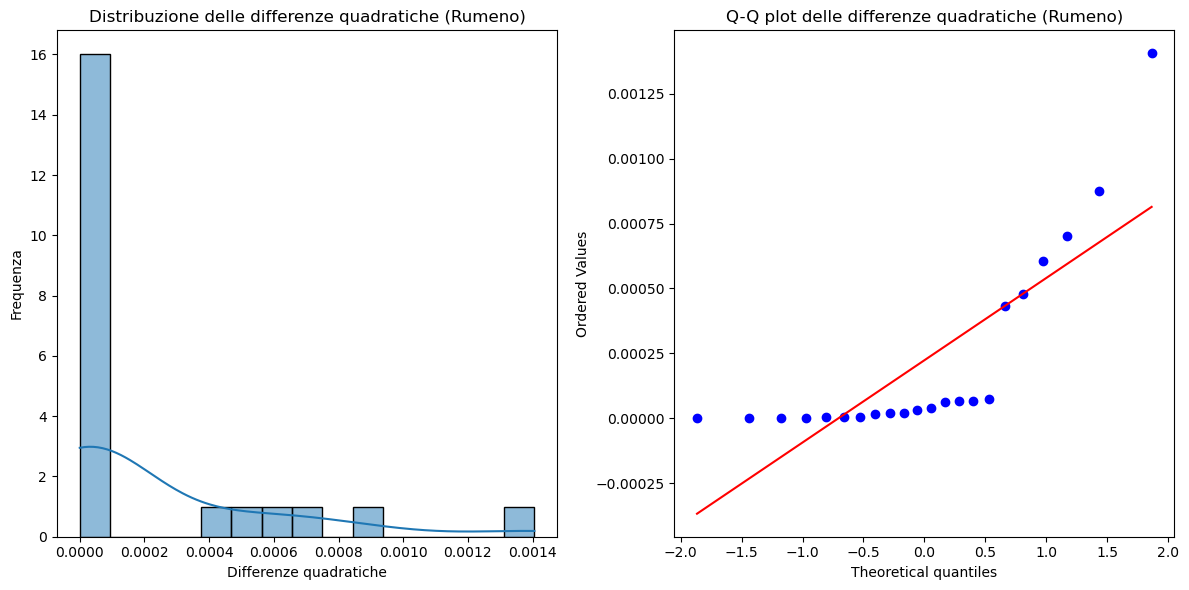